In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the book ratings data
book = pd.read_csv("C://Users//User//Downloads//book (1).csv", encoding='latin-1')

In [3]:
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
# Rename columns for clarity
book_df = book.rename({'User.ID': 'userid', 'Book.Title': 'booktitle', 'Book.Rating': 'bookrating'}, axis=1)

In [5]:
book_df

,Unnamed: 0,userid,booktitle,bookrating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [6]:
# Remove unnecessary column
book_df = book_df.drop(columns=['Unnamed: 0'])

In [7]:
book_df

,userid,booktitle,bookrating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [8]:
# Remove duplicates
book_df.drop_duplicates(subset=['userid', 'booktitle'], inplace=True)


In [9]:
# Pivot table to create user-item matrix
book_user = book_df.pivot_table(values='bookrating',
                                index='userid',
                                columns='booktitle',
                                fill_value=0)

In [10]:
book_user

booktitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
userid,,,,,,,,,,,,,,,,,,,,,
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0


In [11]:
# Calculate cosine similarity between books
book_sim = cosine_similarity(book_user)


In [12]:
book_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
# Convert the similarity scores into a dataframe
book_sim_df = pd.DataFrame(book_sim, index=book_user.index, columns=book_user.index)


In [14]:
book_sim_df

userid,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
userid,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
np.fill_diagonal(book_sim, 0)

In [16]:
# Get the top 5 most similar books for a given book
def get_similar_books_userid(userid,book_user):
    book_index = book_user.index.get_loc(userid)
    similar_books = list(book_sim_df.loc[userid].nlargest(6).index[1:])
    return similar_books
    
def get_similar_books_booktitle(booktitle,book_user):
    similar_books = list(book_user.loc[booktitle].nlargest(6).index[1:])
    return similar_books

In [17]:
print(get_similar_books_userid(8,book_user))
print(get_similar_books_booktitle(8,book_user))

[9, 10, 12, 14, 16]
['Keepers of the Earth Teachers Guide', 'The Celts Activity Book', 'Ancient Celtic Romances', 'The Western way: A practical guide to the Western mystery tradition', 'Truckers']


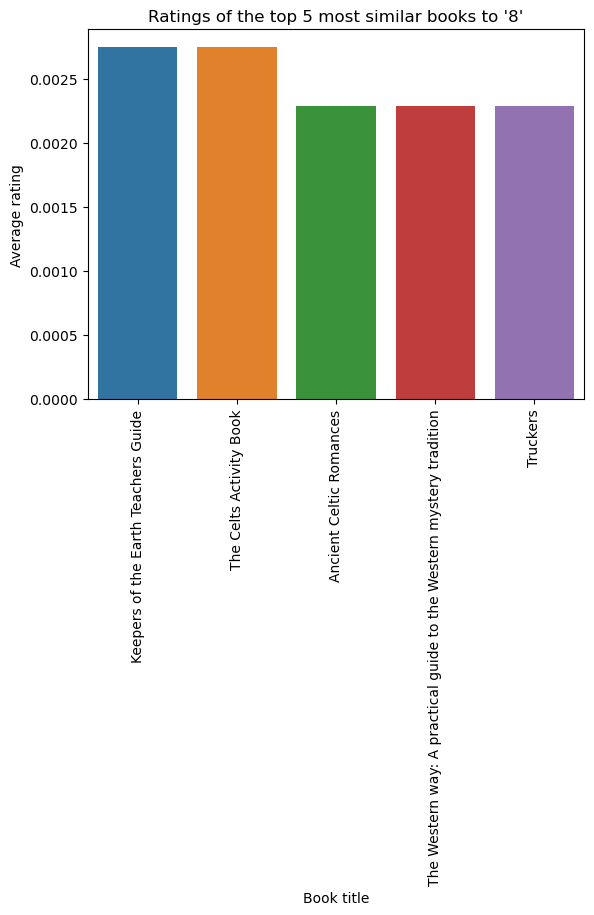

In [35]:
booktitle = 8
similar_books = get_similar_books_booktitle(booktitle, book_user)[:5]
similar_ratings = book_user[similar_books].mean()
sns.barplot(x= similar_ratings.index, y=similar_ratings.values)
plt.title(f"Ratings of the top 5 most similar books to '{booktitle}'")
plt.xlabel("Book title")
plt.ylabel("Average rating")
plt.xticks(rotation=90)
plt.show()

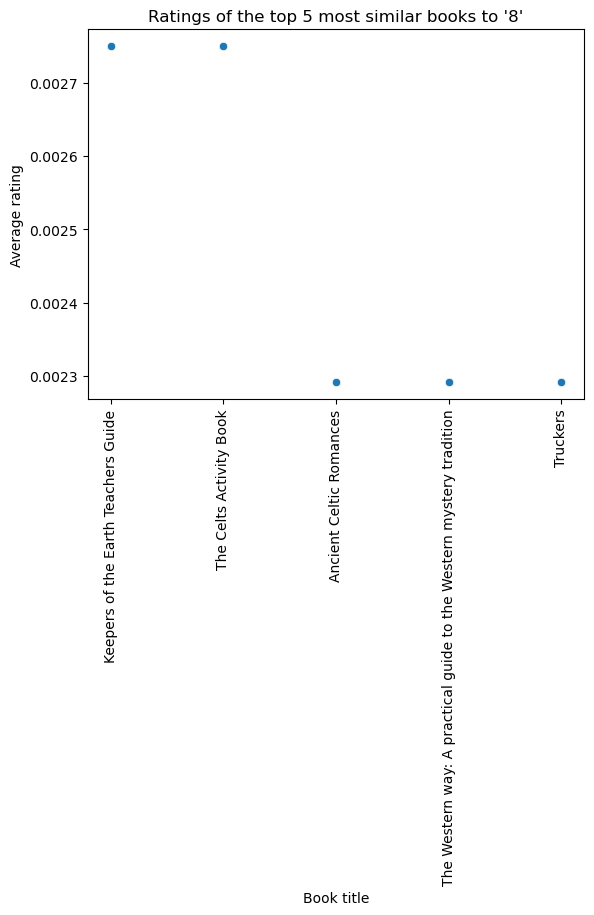

In [36]:
booktitle = 8
similar_books = get_similar_books_booktitle(booktitle, book_user)[:5]
similar_ratings = book_user[similar_books].mean()
sns.scatterplot(x= similar_ratings.index, y=similar_ratings.values)
plt.title(f"Ratings of the top 5 most similar books to '{booktitle}'")
plt.xlabel("Book title")
plt.ylabel("Average rating")
plt.xticks(rotation=90)
plt.show()